In [74]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [75]:
NBATCH = 100
Nunits = 100
std_init = 0.1
x = tf.placeholder(tf.float32, shape=(NBATCH,2))
z = tf.placeholder(tf.float32, shape=(NBATCH,2))

In [76]:
#Generator network
G_w1 = tf.Variable(tf.random_normal([2,Nunits], stddev=std_init))
G_b1 = tf.Variable(tf.zeros([Nunits]))

G_out1 = tf.matmul(z, G_w1)+G_b1
G_hidden1 = tf.nn.relu(G_out1)

G_w2 = tf.Variable(tf.random_normal([Nunits,2], stddev=std_init))
G_b2 = tf.Variable(tf.zeros([2]))

G_out2 = tf.matmul(G_hidden1, G_w2)+G_b2

In [77]:
#Discriminator network parameters
D_w1 = tf.Variable(tf.random_normal([2,Nunits], stddev=std_init))
D_b1 = tf.Variable(tf.zeros([Nunits]))

D_w2 = tf.Variable(tf.random_normal([Nunits,1], stddev=std_init))
D_b2 = tf.Variable(tf.zeros([1]))

In [78]:
def discriminator_forward(x_in):
    D_out1 = tf.matmul(x_in, D_w1)+D_b1
    D_hidden1 = tf.nn.relu(D_out1)
    
    D_out2 = tf.matmul(D_hidden1,D_w2)+D_b2
    D_out2 = tf.sigmoid(D_out2)
    
    return D_out2

In [79]:
real_out = discriminator_forward(x)

fake_out = discriminator_forward(G_out2)

In [80]:
D_loss = -tf.reduce_mean(tf.log(real_out)) - tf.reduce_mean(tf.log(1-fake_out))

G_loss1 = -tf.reduce_mean(tf.log(fake_out))

G_loss2 = tf.reduce_mean(tf.log(1-fake_out))

In [81]:
#set up optimization
lr = 1e-5
momentum = 0.9

In [82]:
opt = tf.train.MomentumOptimizer(lr,momentum)

D_train = opt.minimize(D_loss, var_list=[D_w1,D_b1,D_w2,D_b2])

G_train1 = opt.minimize(G_loss1, var_list=[G_w1,G_b1,G_w2,G_b2])

G_train2 = opt.minimize(G_loss2, var_list=[G_w1,G_b1,G_w2,G_b2])

In [83]:
#set up session and initialize
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [100]:
Niter1 = 100
Niter2 = 100000
print_step = 10000

In [85]:
for step in xrange(Niter1+1):
    
    xr = np.random.randn(NBATCH,2)/2
    zr = np.random.rand(NBATCH,2)*2-1
    
    sess.run(D_train, feed_dict={x:xr, z:zr})
    
    zr = np.random.rand(NBATCH,2)*2-1
    
    sess.run(G_train1, feed_dict={z:zr})
    
    if step%print_step == 0:
    
        dl=sess.run(D_loss,feed_dict={x:xr,z:zr})
        gl=sess.run(G_loss1,feed_dict={z:zr})
        
        print "Discriminator loss: ", dl, ", Generator loss: ", gl

Discriminator loss:  1.38403 , Generator loss:  0.692857
Discriminator loss:  1.38077 , Generator loss:  0.692907
Discriminator loss:  1.38663 , Generator loss:  0.692635
Discriminator loss:  1.3792 , Generator loss:  0.693273
Discriminator loss:  1.38021 , Generator loss:  0.693301
Discriminator loss:  1.38676 , Generator loss:  0.693155
Discriminator loss:  1.38378 , Generator loss:  0.692346
Discriminator loss:  1.38217 , Generator loss:  0.692851
Discriminator loss:  1.38233 , Generator loss:  0.692708
Discriminator loss:  1.38177 , Generator loss:  0.693323
Discriminator loss:  1.3809 , Generator loss:  0.693535


In [ ]:
for step in xrange(Niter2+1):
    
    xr = np.random.randn(NBATCH,2)/2
    zr = np.random.rand(NBATCH,2)*2-1
    
    sess.run(D_train, feed_dict={x:xr, z:zr})
    
    zr = np.random.rand(NBATCH,2)*2-1
    
    sess.run(G_train2, feed_dict={z:zr})
    
    if step%print_step == 0:
    
        dl=sess.run(D_loss,feed_dict={x:xr,z:zr})
        gl=sess.run(G_loss1,feed_dict={z:zr})
        
        print "Discriminator loss: ", dl, ", Generator loss: ", gl

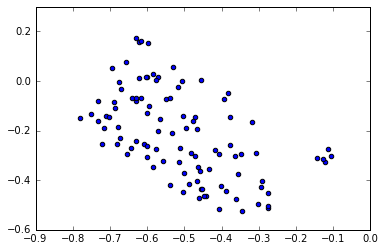

In [104]:

zr = np.random.rand(NBATCH,2)/2

out = sess.run(G_out2, feed_dict={z:zr})

plt.scatter(out[:,0], out[:,1])
plt.show()